# Exploratory Data Analysis- Google Analytics Customer Prediction

## Table of Contents

    1. Introduction
    2. Importing
    3. Feature details of data
    4. Visualizations of possible important integer features
        a. hits_y
        b. pageviews
        c. sessionQualityDim
        d. timeOnSite
        e. previousCustomer
    5. Visualizations of possible important object features
        a. channelGrouping
        b. Browser
        c. operatingSystem
        d. deviceCategory
        e. continent
        f. subContinent
        g. country
        h. region
        i. metro
        j. city
        k. networkDomain
        l. source
        m. medium
        n. keyword
        o. referralPath
        p. isTrueDirect
        q. adContent
        r. adwordsClickInfo.slot
        s. adwordsClickInfo.gclId 
        t. adwordsClickInfo.adNetworkType
    6. Summary 

### 1. Introduction

In this notebook, the possible trends and correlations will be explored. We will look at how different features interact with our main feature of transaction complete. 

### 2. Importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import math

In [2]:
df = pd.read_csv('df_clean.csv')

/Users/kasey.larsen/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### 3. Feature details of data

In [3]:
df.head()

,channelGrouping,fullVisitorId,visitNumber,browser,operatingSystem,isMobile,deviceCategory,continent,subContinent,country,...,adwordsClickInfo.gclId,adwordsClickInfo.adNetworkType,campaignCode,weekday,day,month,year,total_transactions,previousCustomer,transaction_Complete
0,Referral,3435038497055563502,1,Chrome,Android,1,mobile,Europe,Eastern Europe,Poland,...,0,0,0,2,16,11,2016,0,0.0,0
1,Organic Search,2026697798974073101,1,Chrome,Macintosh,0,desktop,Europe,Western Europe,France,...,0,0,0,4,8,12,2017,0,0.0,0
2,Paid Search,5550489393443093714,2,Chrome,Macintosh,0,desktop,Americas,Northern America,United States,...,Cj0KEQiAx7XBBRCdyNOw6PLHrYABEiQAJtyEQw0uESg4jX...,Google Search,0,4,18,11,2016,0,0.0,0
3,Organic Search,2811375652703298226,2,Chrome,Windows,0,desktop,Americas,Northern America,Canada,...,0,0,0,1,6,6,2017,0,0.0,0
4,Organic Search,8767946855491020519,1,Chrome,Macintosh,0,desktop,Asia,Southeast Asia,Philippines,...,0,0,0,1,13,2,2018,0,0.0,0


In [4]:
df.shape

(85417, 40)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85417 entries, 0 to 85416
Data columns (total 40 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   channelGrouping                 85417 non-null  object 
 1   fullVisitorId                   85417 non-null  object 
 2   visitNumber                     85417 non-null  int64  
 3   browser                         85417 non-null  object 
 4   operatingSystem                 85417 non-null  object 
 5   isMobile                        85417 non-null  int64  
 6   deviceCategory                  85417 non-null  object 
 7   continent                       85417 non-null  object 
 8   subContinent                    85417 non-null  object 
 9   country                         85417 non-null  object 
 10  region                          85417 non-null  object 
 11  metro                           85417 non-null  object 
 12  city                            

### 4. Visualizations of possible important features

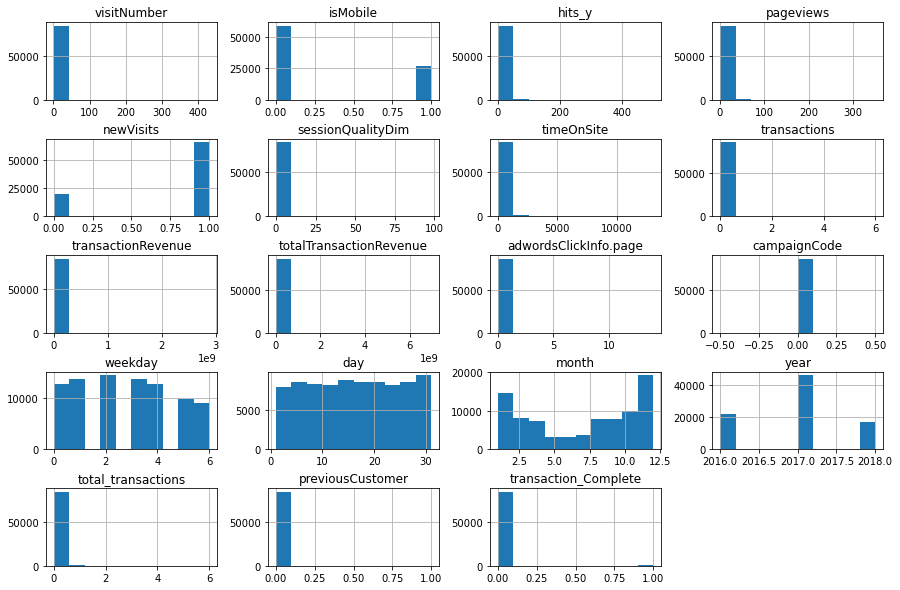

In [6]:
# All histograms
df.hist(figsize = (15,10))
plt.subplots_adjust(hspace=0.5);

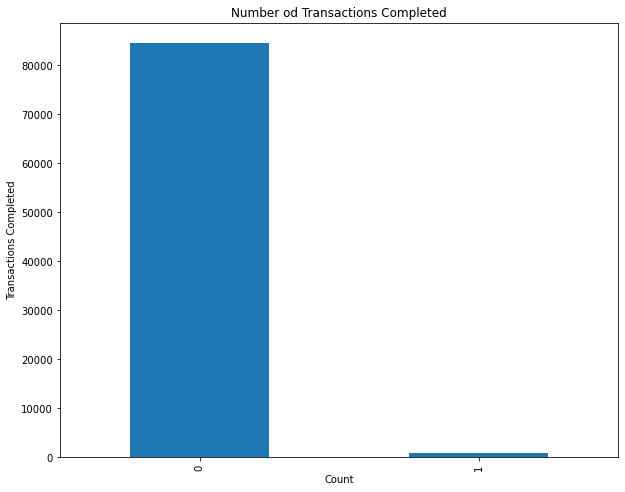

In [7]:
plt.figure(figsize = [10, 8]) 
chart = df['transaction_Complete'].value_counts().plot(kind='bar')
plt.title('Number od Transactions Completed')
plt.ylabel('Transactions Completed')
plt.xlabel('Count')
plt.show();

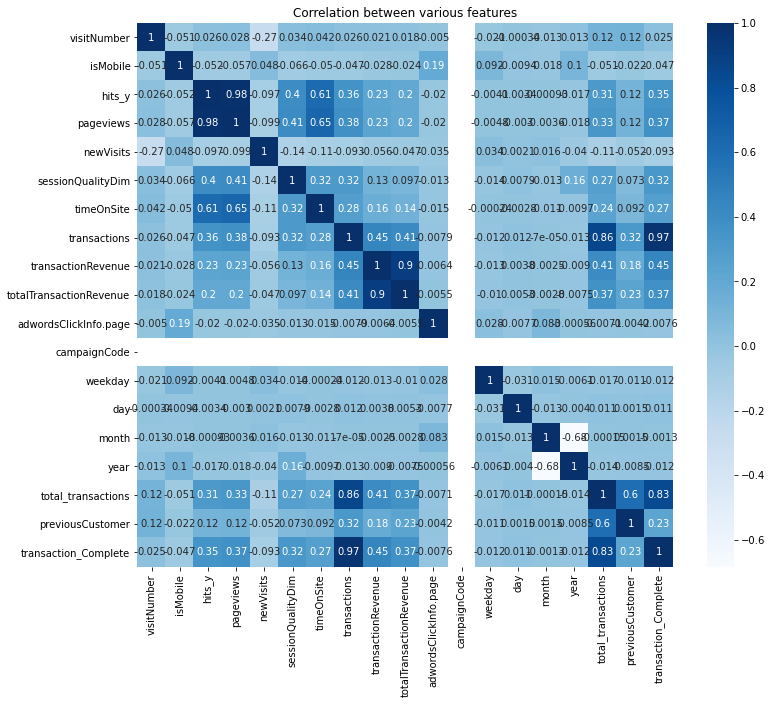

In [8]:
plt.figure(figsize=(12,10))
p=sns.heatmap(df.corr(), annot=True,cmap ='Blues')
plt.title('Correlation between various features');

#### Based off the correlation to our target feature, transaction_complete, we will explore the following features further: hits_y, pageviews, sessionQualityDim, timeOnSite, previousCustomer. We will not explore transactions or the revenue further, because their correlation is to be expected. 

### 4a. hits_y

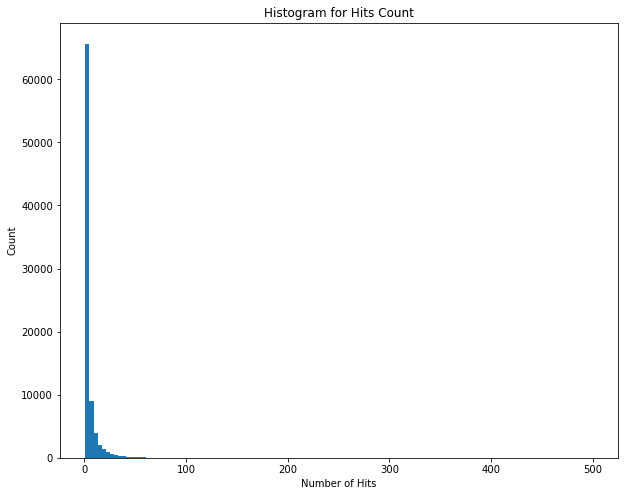

In [9]:
w = 4
n = math.ceil((df['hits_y'].max() - df['hits_y'].min())/w)
plt.figure(figsize=(10, 8))
plt.hist(df['hits_y'], bins = n)
plt.title('Histogram for Hits Count')
plt.xlabel('Number of Hits')
plt.ylabel('Count');

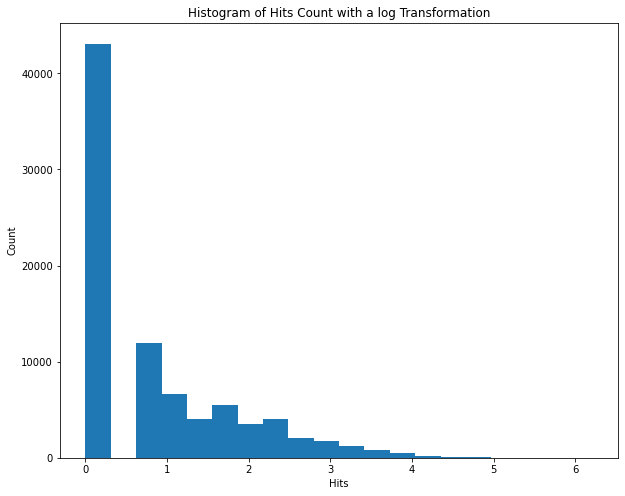

In [10]:
df_hits_transformed = np.log(df['hits_y'])
plt.figure(figsize=(10, 8))
plt.hist(df_hits_transformed, bins = 20)
plt.title('Histogram of Hits Count with a log Transformation')
plt.xlabel('Hits')
plt.ylabel('Count');

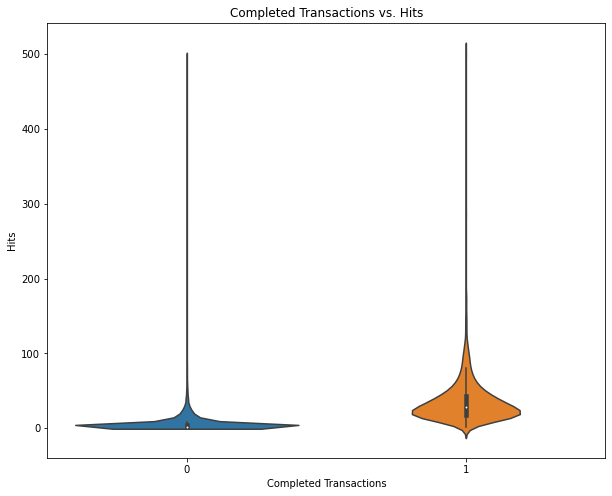

In [11]:
plt.figure(figsize = [10, 8]) 
sns.violinplot(data = df, x = 'transaction_Complete', y = 'hits_y')
plt.title('Completed Transactions vs. Hits')
plt.xlabel('Completed Transactions')
plt.ylabel('Hits');

### 4b. pageviews

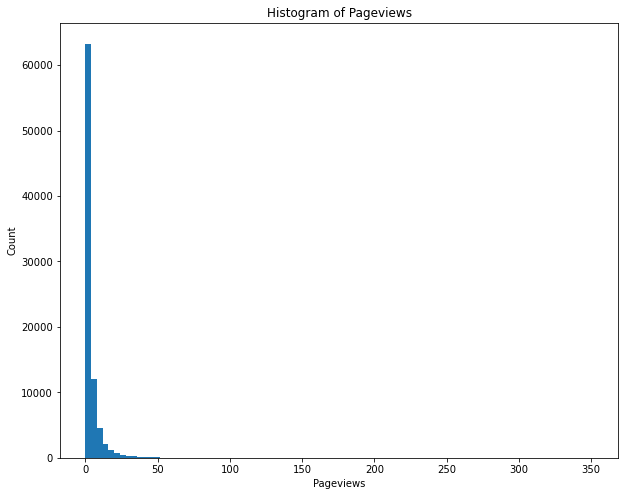

In [12]:
w = 4
n = math.ceil((df['pageviews'].max() - df['pageviews'].min())/w)
plt.figure(figsize=(10, 8))
plt.hist(df['pageviews'], bins = n)
plt.title('Histogram of Pageviews')
plt.xlabel('Pageviews')
plt.ylabel('Count');

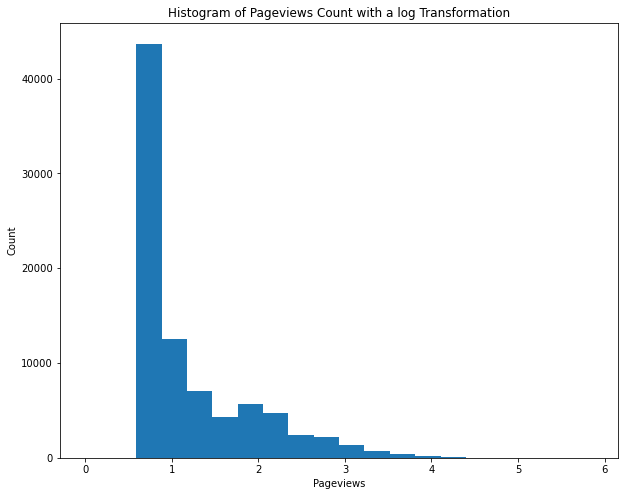

In [13]:
df_pageviews_transformed = np.log(df['pageviews'] + 1)
plt.figure(figsize=(10, 8))
plt.hist(df_pageviews_transformed, bins = 20)
plt.title('Histogram of Pageviews Count with a log Transformation')
plt.xlabel('Pageviews')
plt.ylabel('Count');

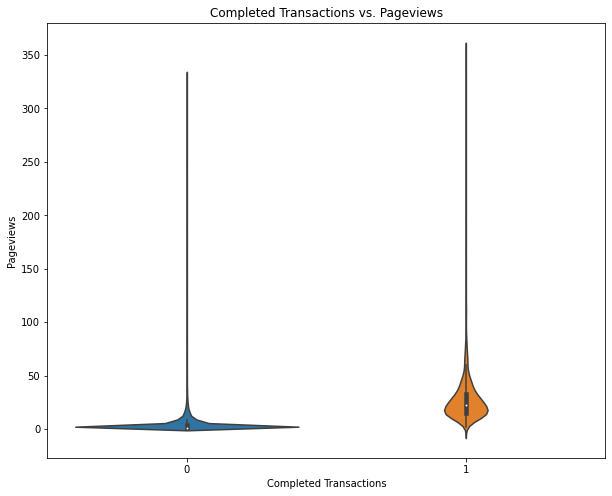

In [14]:
plt.figure(figsize = [10, 8]) 
sns.violinplot(data = df, x = 'transaction_Complete', y = 'pageviews')
plt.title('Completed Transactions vs. Pageviews')
plt.xlabel('Completed Transactions')
plt.ylabel('Pageviews');

### 4c. sessionQualityDim

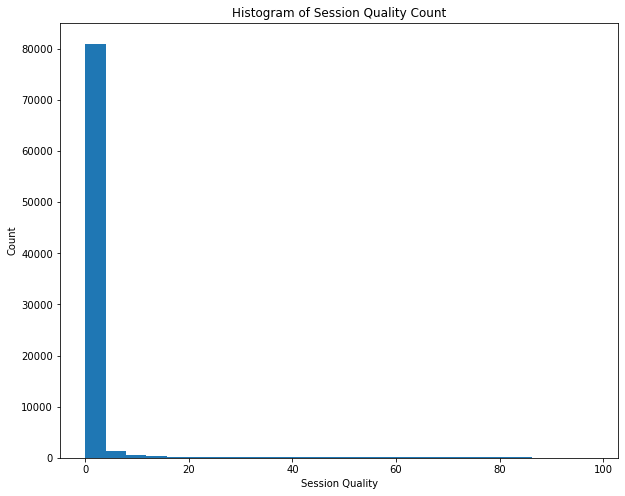

In [15]:
w = 4
n = math.ceil((df['sessionQualityDim'].max() - df['sessionQualityDim'].min())/w)
plt.figure(figsize=(10, 8))
plt.hist(df['sessionQualityDim'], bins = n)
plt.title('Histogram of Session Quality Count')
plt.xlabel('Session Quality')
plt.ylabel('Count');

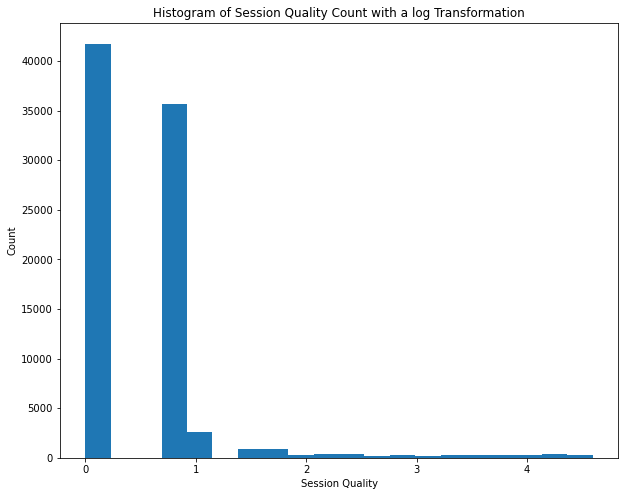

In [16]:
df_pageviews_transformed = np.log(df['sessionQualityDim'] + 1)
plt.figure(figsize=(10, 8))
plt.hist(df_pageviews_transformed, bins = 20)
plt.title('Histogram of Session Quality Count with a log Transformation')
plt.xlabel('Session Quality')
plt.ylabel('Count');

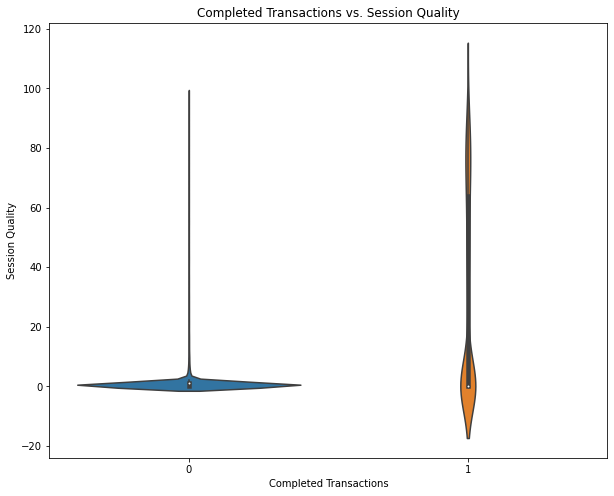

In [17]:
plt.figure(figsize = [10, 8]) 
sns.violinplot(data = df, x = 'transaction_Complete', y = 'sessionQualityDim')
plt.title('Completed Transactions vs. Session Quality')
plt.xlabel('Completed Transactions')
plt.ylabel('Session Quality');

### 4d. timeOnSite

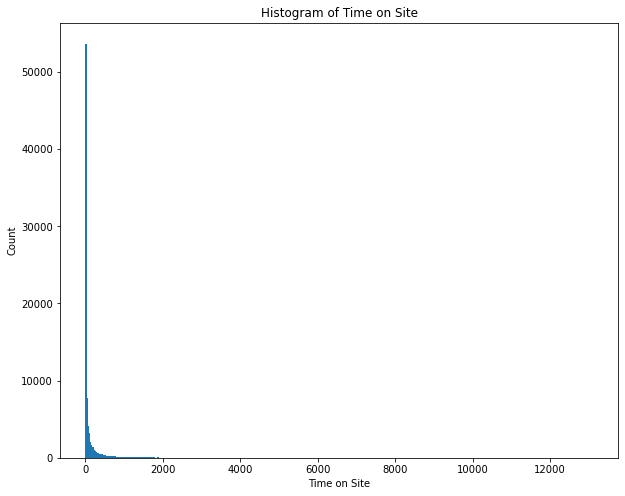

In [18]:
w = 30
n = math.ceil((df['timeOnSite'].max() - df['timeOnSite'].min())/w)
plt.figure(figsize=(10, 8))
plt.hist(df['timeOnSite'], bins = n)
plt.title('Histogram of Time on Site')
plt.xlabel('Time on Site')
plt.ylabel('Count');

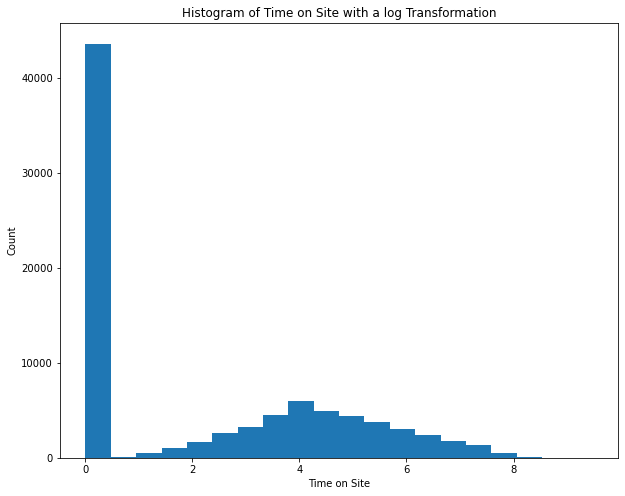

In [19]:
df_pageviews_transformed = np.log(df['timeOnSite'] + 1)
plt.figure(figsize=(10, 8))
plt.hist(df_pageviews_transformed, bins = 20)
plt.title('Histogram of Time on Site with a log Transformation')
plt.xlabel('Time on Site')
plt.ylabel('Count');

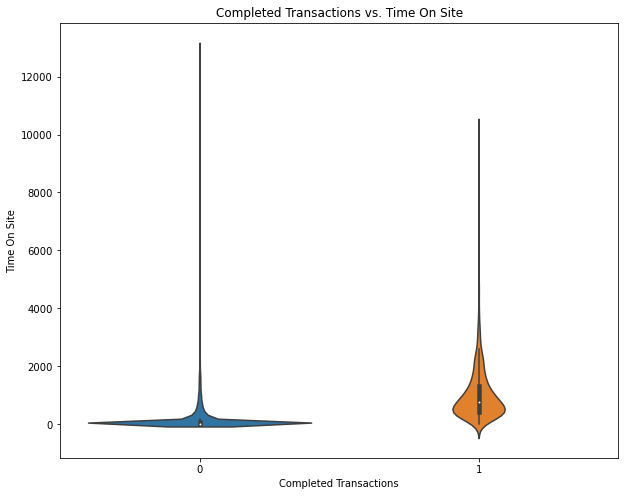

In [20]:
plt.figure(figsize = [10, 8]) 
sns.violinplot(data = df, x = 'transaction_Complete', y = 'timeOnSite')
plt.title('Completed Transactions vs. Time On Site')
plt.xlabel('Completed Transactions')
plt.ylabel('Time On Site');

### 4e. Previous Customer

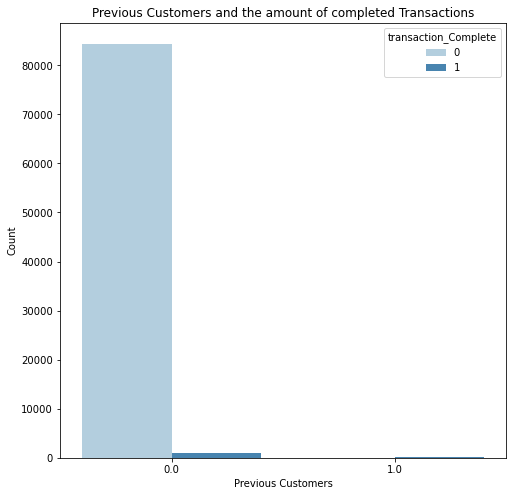

In [21]:
plt.figure(figsize = [8, 8])

sns.countplot(data = df, x = 'previousCustomer', hue = 'transaction_Complete', palette = 'Blues')
plt.title('Previous Customers and the amount of completed Transactions')
plt.xlabel('Previous Customers')
plt.ylabel('Count')
plt.show();

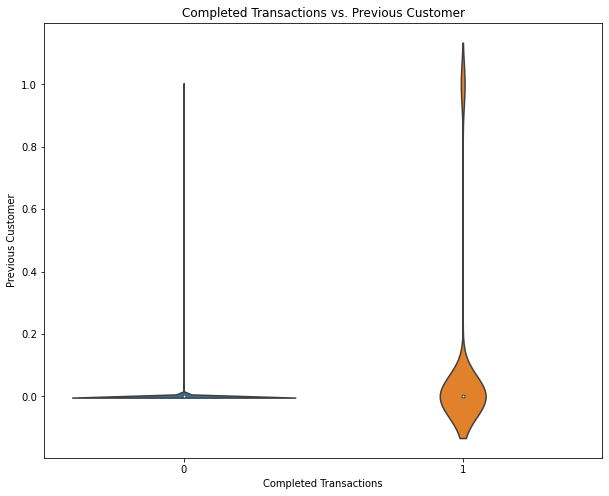

In [22]:
plt.figure(figsize = [10, 8]) 
sns.violinplot(data = df, x = 'transaction_Complete', y = 'previousCustomer')
plt.title('Completed Transactions vs. Previous Customer')
plt.xlabel('Completed Transactions')
plt.ylabel('Previous Customer');

### 5. Visualizations of possible important object features

### 5a. channelGrouping

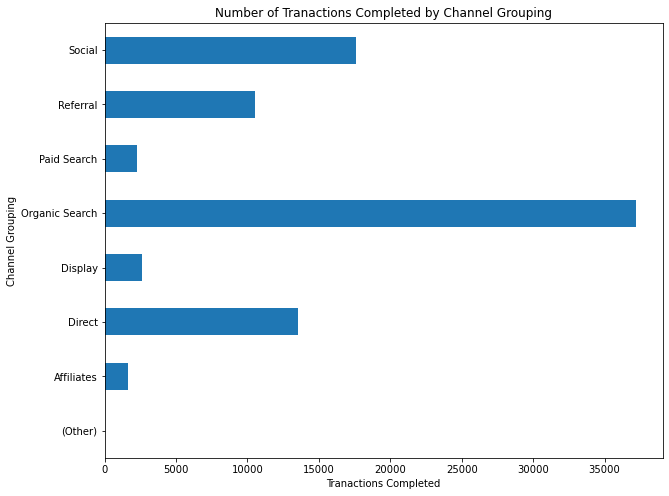

In [23]:
df_grouped = df.groupby(['channelGrouping'])['transaction_Complete'].count()
df_grouped.plot(kind='barh', figsize=(10, 8))
plt.title('Number of Tranactions Completed by Channel Grouping')
plt.xlabel('Tranactions Completed')
plt.ylabel('Channel Grouping');

### 5b. Browser

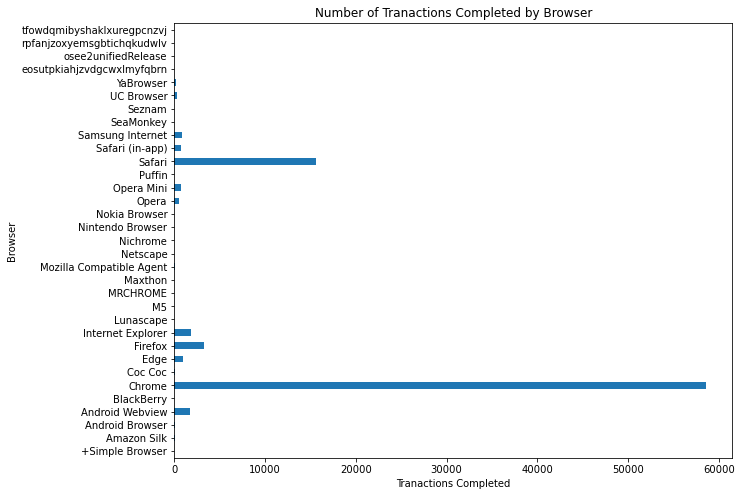

In [24]:
# Transaction count for all Transactions by browser
df_grouped = df.groupby(['browser'])['transaction_Complete'].count()
df_grouped.plot(kind='barh', figsize=(10, 8))
plt.title('Number of Tranactions Completed by Browser')
plt.xlabel('Tranactions Completed')
plt.ylabel('Browser');

### 5c. operatingSystem

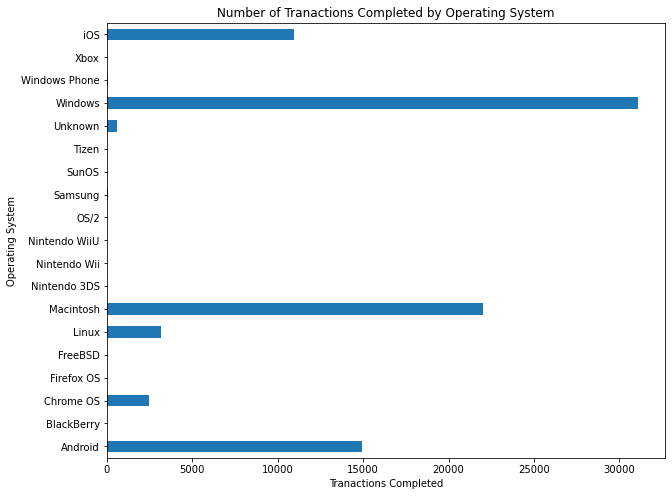

In [25]:
df_grouped = df.groupby(['operatingSystem'])['transaction_Complete'].count()
df_grouped.plot(kind='barh', figsize=(10, 8))
plt.title('Number of Tranactions Completed by Operating System')
plt.xlabel('Tranactions Completed')
plt.ylabel('Operating System');

### 5d. deviceCategory

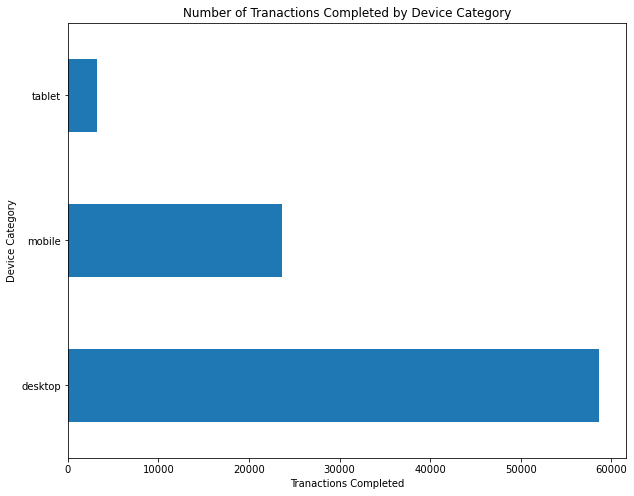

In [26]:
df_grouped = df.groupby(['deviceCategory'])['transaction_Complete'].count()
df_grouped.plot(kind='barh', figsize=(10, 8))
plt.title('Number of Tranactions Completed by Device Category')
plt.xlabel('Tranactions Completed')
plt.ylabel('Device Category');

### 5e. continent

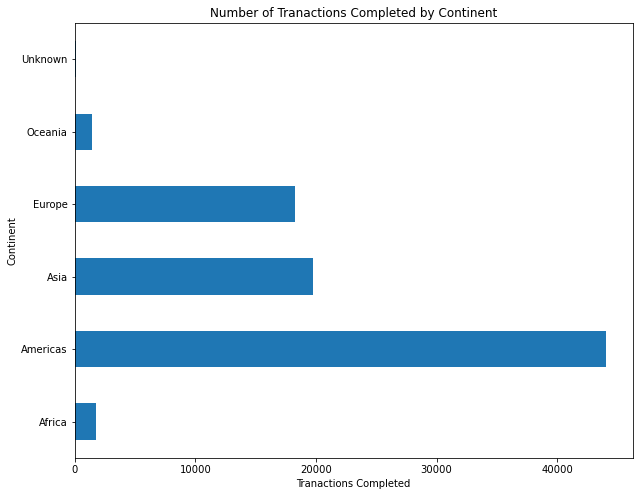

In [27]:
df_grouped = df.groupby(['continent'])['transaction_Complete'].count()
df_grouped.plot(kind='barh', figsize=(10, 8))
plt.title('Number of Tranactions Completed by Continent')
plt.xlabel('Tranactions Completed')
plt.ylabel('Continent');

### 5f. subContinent

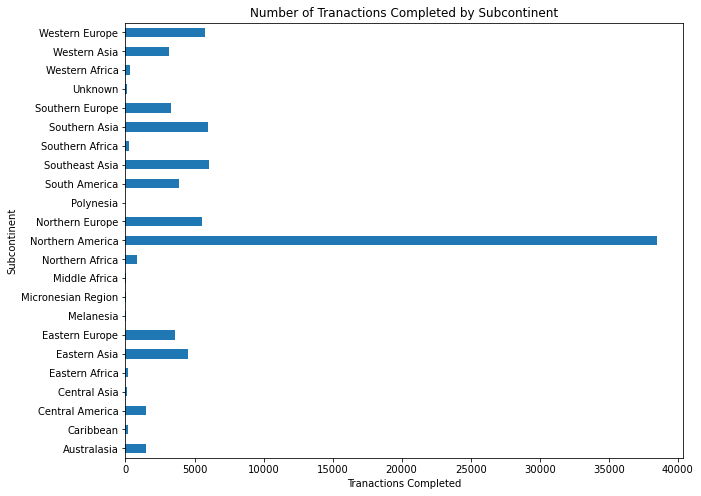

In [28]:
df_grouped = df.groupby(['subContinent'])['transaction_Complete'].count()
df_grouped.plot(kind='barh', figsize=(10, 8))
plt.title('Number of Tranactions Completed by Subcontinent')
plt.xlabel('Tranactions Completed')
plt.ylabel('Subcontinent');

### 5g. country

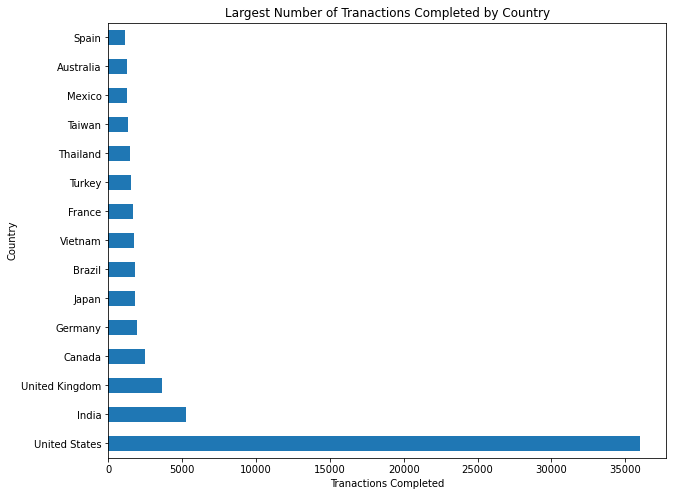

In [29]:
df_grouped = df.groupby(['country'])['transaction_Complete'].count().nlargest(15)
df_grouped.plot(kind='barh', figsize=(10, 8))
plt.title('Largest Number of Tranactions Completed by Country')
plt.xlabel('Tranactions Completed')
plt.ylabel('Country');

### 5h. region

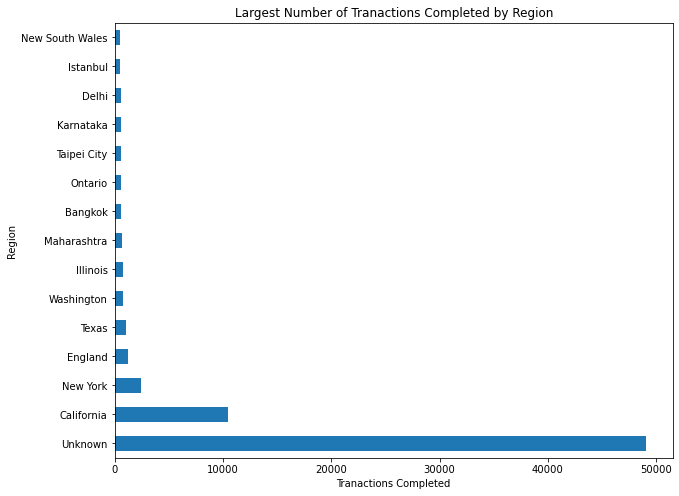

In [30]:
df_grouped = df.groupby(['region'])['transaction_Complete'].count().nlargest(15)
df_grouped.plot(kind='barh', figsize=(10, 8))
plt.title('Largest Number of Tranactions Completed by Region')
plt.xlabel('Tranactions Completed')
plt.ylabel('Region');

### 5i. metro

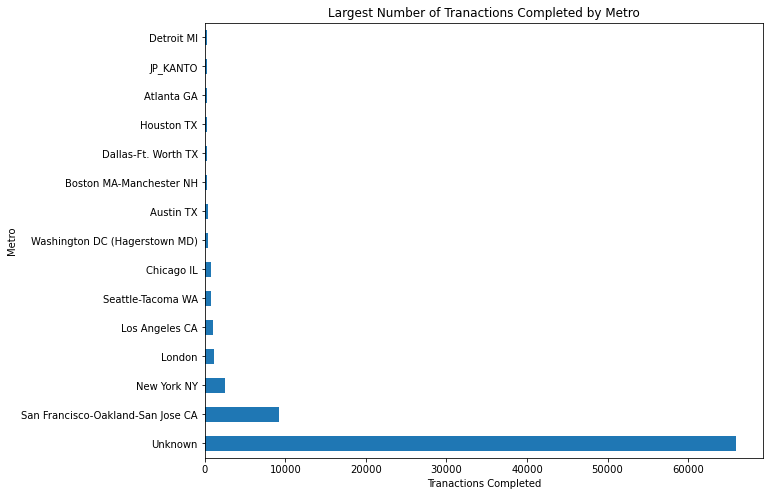

In [31]:
df_grouped = df.groupby(['metro'])['transaction_Complete'].count().nlargest(15)
df_grouped.plot(kind='barh', figsize=(10, 8))
plt.title('Largest Number of Tranactions Completed by Metro')
plt.xlabel('Tranactions Completed')
plt.ylabel('Metro');

### 5j. city

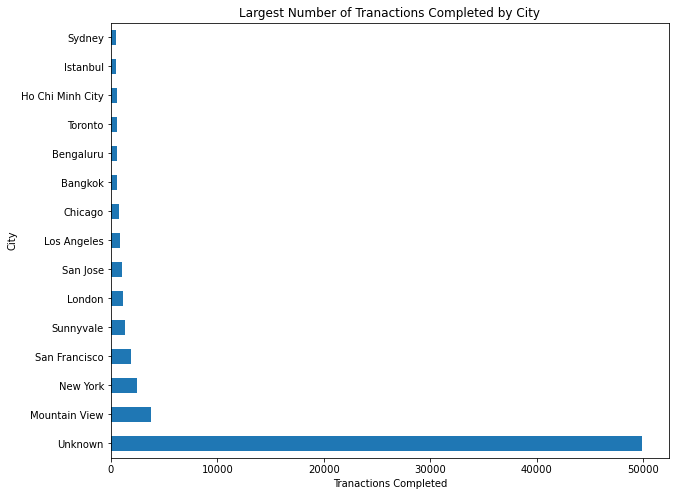

In [32]:
df_grouped = df.groupby(['city'])['transaction_Complete'].count().nlargest(15)
df_grouped.plot(kind='barh', figsize=(10, 8))
plt.title('Largest Number of Tranactions Completed by City')
plt.xlabel('Tranactions Completed')
plt.ylabel('City');

### 5k. networkDomain

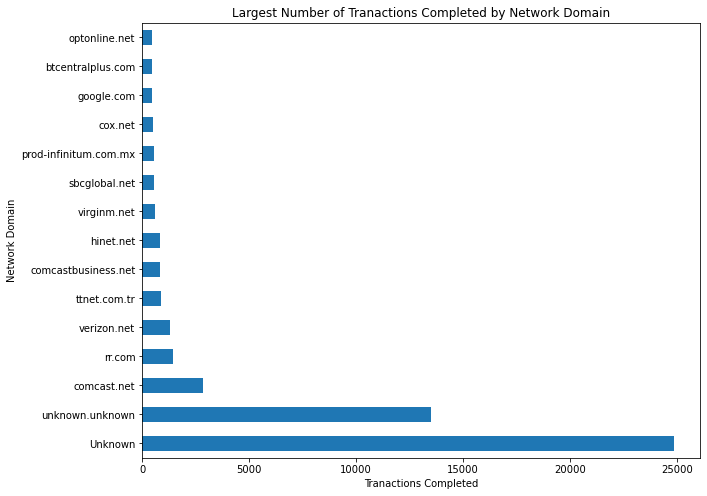

In [33]:
df_grouped = df.groupby(['networkDomain'])['transaction_Complete'].count().nlargest(15)
df_grouped.plot(kind='barh', figsize=(10, 8))
plt.title('Largest Number of Tranactions Completed by Network Domain')
plt.xlabel('Tranactions Completed')
plt.ylabel('Network Domain');

### 5l. source

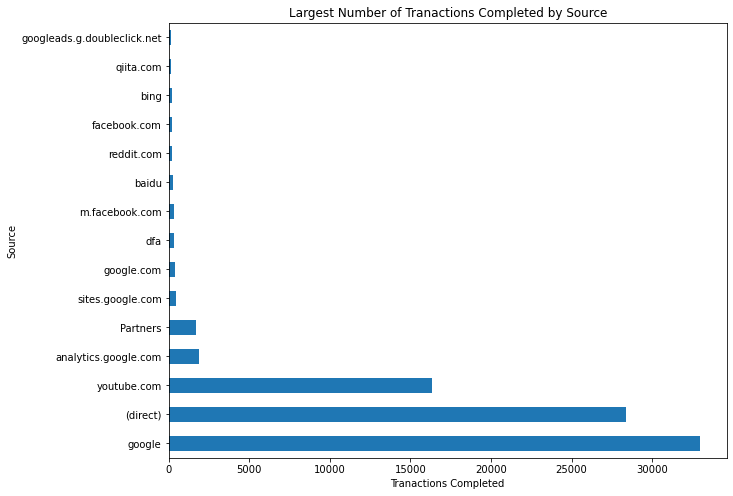

In [34]:
df_grouped = df.groupby(['source'])['transaction_Complete'].count().nlargest(15)
df_grouped.plot(kind='barh', figsize=(10, 8))
plt.title('Largest Number of Tranactions Completed by Source')
plt.xlabel('Tranactions Completed')
plt.ylabel('Source');

### 5m. medium

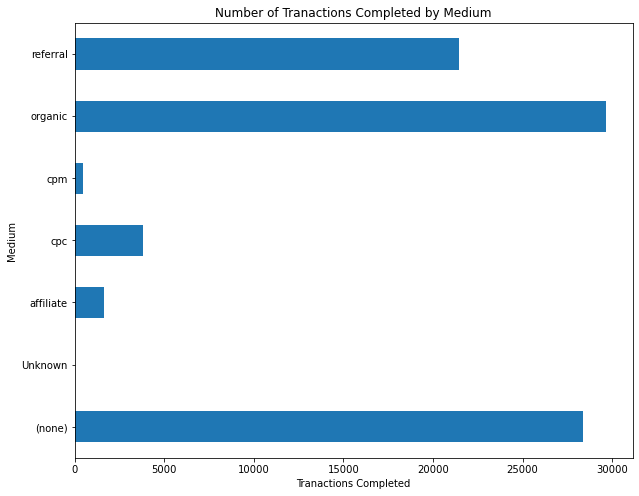

In [35]:
df_grouped = df.groupby(['medium'])['transaction_Complete'].count()
df_grouped.plot(kind='barh', figsize=(10, 8))
plt.title('Number of Tranactions Completed by Medium')
plt.xlabel('Tranactions Completed')
plt.ylabel('Medium');

### 5n. keyword

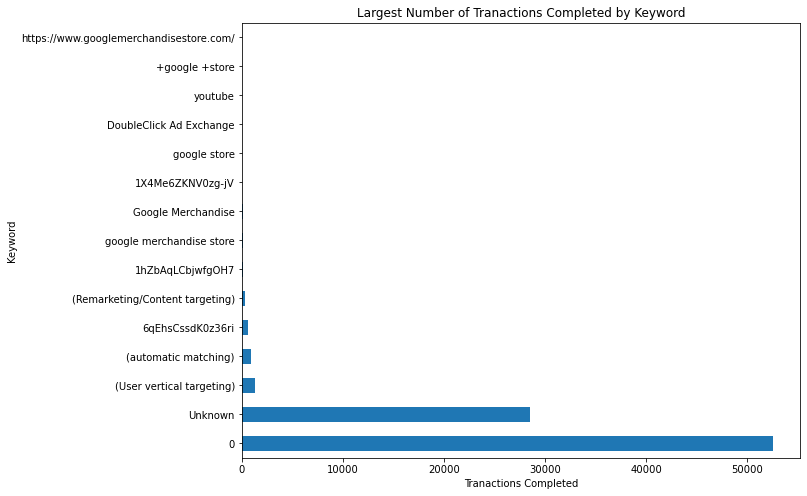

In [36]:
df_grouped = df.groupby(['keyword'])['transaction_Complete'].count().nlargest(15)
df_grouped.plot(kind='barh', figsize=(10, 8))
plt.title('Largest Number of Tranactions Completed by Keyword')
plt.xlabel('Tranactions Completed')
plt.ylabel('Keyword');

### 5o. referralPath

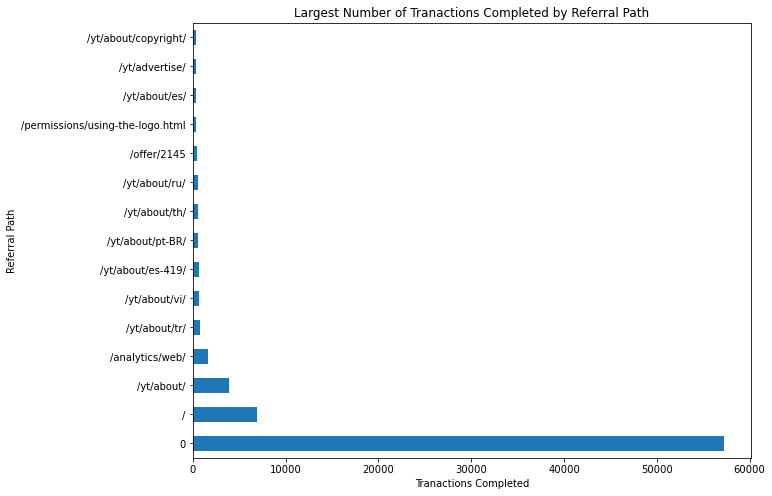

In [37]:
df_grouped = df.groupby(['referralPath'])['transaction_Complete'].count().nlargest(15)
df_grouped.plot(kind='barh', figsize=(10, 8))
plt.title('Largest Number of Tranactions Completed by Referral Path')
plt.xlabel('Tranactions Completed')
plt.ylabel('Referral Path');

### 5p. isTrueDirect

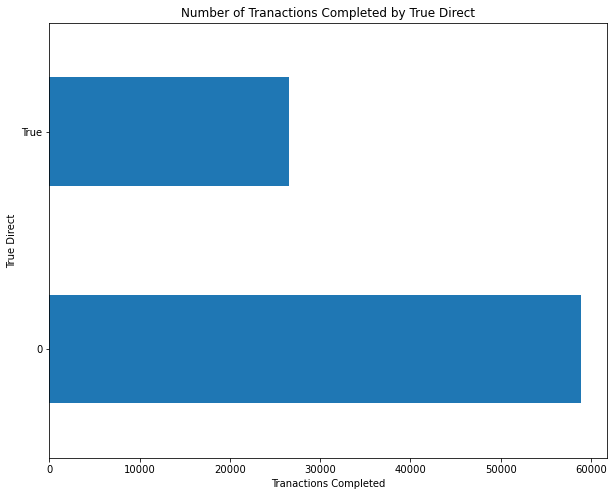

In [38]:
df_grouped = df.groupby(['isTrueDirect'])['transaction_Complete'].count()
df_grouped.plot(kind='barh', figsize=(10, 8))
plt.title('Number of Tranactions Completed by True Direct')
plt.xlabel('Tranactions Completed')
plt.ylabel('True Direct');

### 5q. adContent

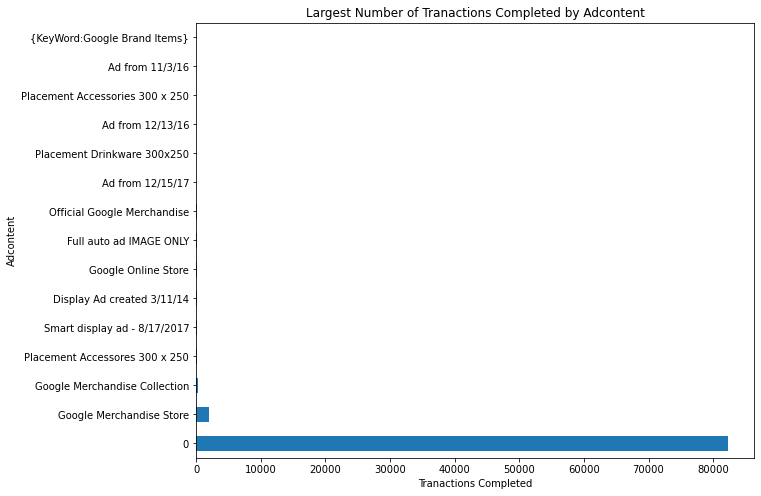

In [39]:
df_grouped = df.groupby(['adContent'])['transaction_Complete'].count().nlargest(15)
df_grouped.plot(kind='barh', figsize=(10, 8))
plt.title('Largest Number of Tranactions Completed by Adcontent')
plt.xlabel('Tranactions Completed')
plt.ylabel('Adcontent');

### 5r. adwordsClickInfo.slot

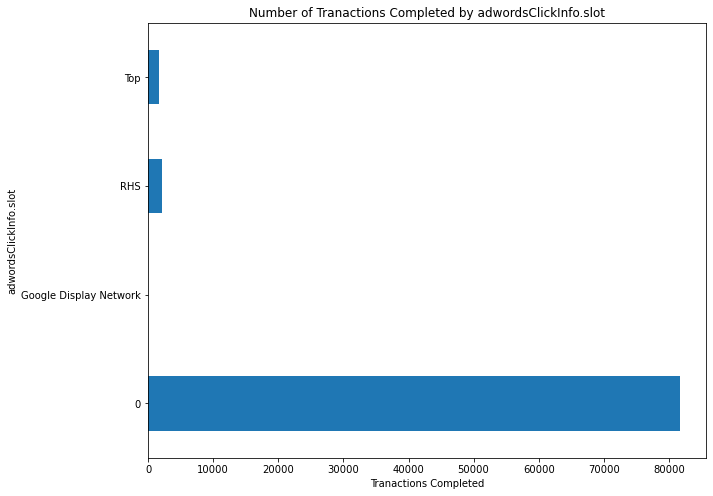

In [40]:
df_grouped = df.groupby(['adwordsClickInfo.slot'])['transaction_Complete'].count()
df_grouped.plot(kind='barh', figsize=(10, 8))
plt.title('Number of Tranactions Completed by adwordsClickInfo.slot')
plt.xlabel('Tranactions Completed')
plt.ylabel('adwordsClickInfo.slot');

### 5s. adwordsClickInfo.gclId

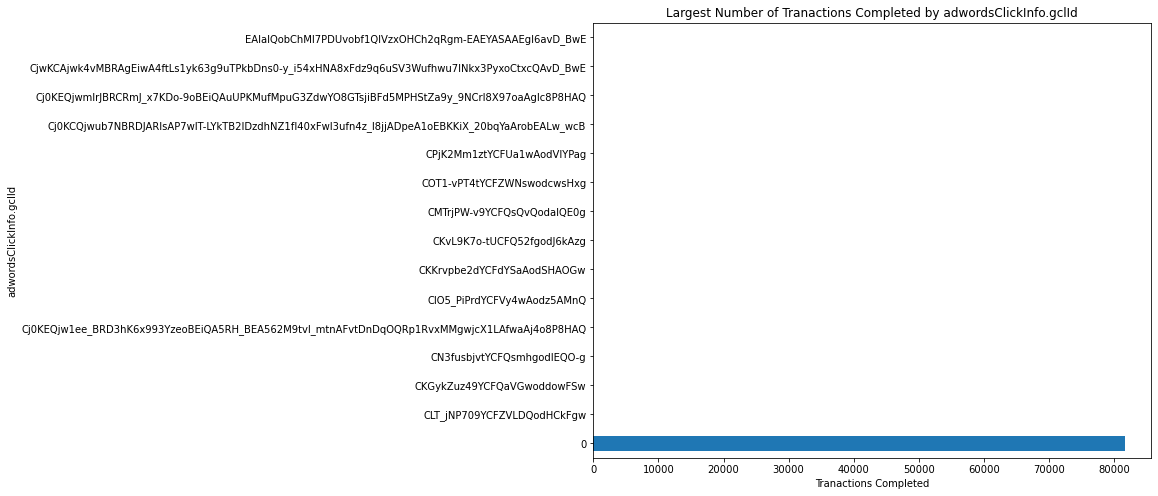

In [41]:
df_grouped = df.groupby(['adwordsClickInfo.gclId'])['transaction_Complete'].count().nlargest(15)
df_grouped.plot(kind='barh', figsize=(10, 8))
plt.title('Largest Number of Tranactions Completed by adwordsClickInfo.gclId')
plt.xlabel('Tranactions Completed')
plt.ylabel('adwordsClickInfo.gclId');

### 5t. adwordsClickInfo.adNetworkType

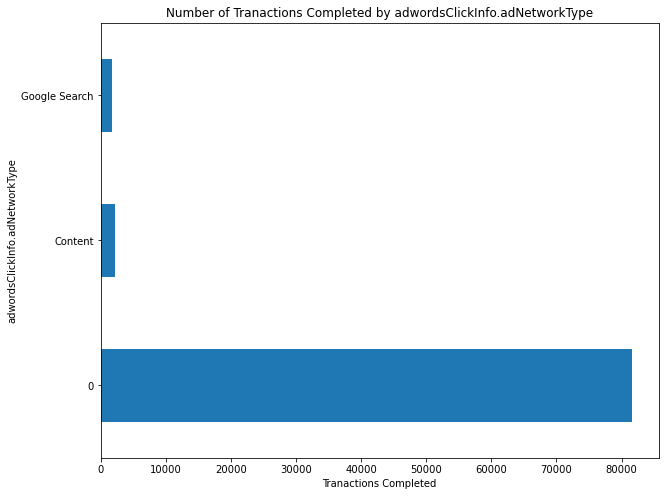

In [42]:
df_grouped = df.groupby(['adwordsClickInfo.adNetworkType'])['transaction_Complete'].count()
df_grouped.plot(kind='barh', figsize=(10, 8))
plt.title('Number of Tranactions Completed by adwordsClickInfo.adNetworkType')
plt.xlabel('Tranactions Completed')
plt.ylabel('adwordsClickInfo.adNetworkType');

### 6. Summary

After reviewing the correlations and visuals, the following features appear to have some importance:
    
    1. hits_y
    2. pageviews
    3. sessionQualityDim
    4. timeOnSite
    5. previousCustomer
    6. Browser
    7. location